# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
sia = SentimentIntensityAnalyzer()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [6]:
# Read in data
data = pd.read_csv('../datasets/Reviews.csv')
print(data.shape)


(568454, 10)


In [3]:
# Create a new DataFrame with only the 'Score' column
score_df = data[['Id','Score','Text']]

# Group by 'Score' and limit the number of rows to 100 for each group
test_data = score_df.groupby('Score').head(5000)

# Print the shape of the balanced DataFrame
print(test_data.shape)

(25000, 3)


In [4]:
test_data.head()

,Id,Score,Text
0,1,5,I have bought several of the Vitality canned d...
1,2,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,This is a confection that has been around a fe...
3,4,2,If you are looking for the secret ingredient i...
4,5,5,Great taffy at a great price. There was a wid...


In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punct(text):
    text_no_punct = "".join([char for char in text if char not in string.punctuation])
    return text_no_punct
    

In [7]:
test_data.columns

Index(['Id', 'Score', 'Text'], dtype='object')

In [8]:
df = test_data.copy()
df['nopunct_text'] = df['Text'].apply(lambda x: remove_punct(x.lower()))


In [9]:
df.loc[100, ['Text', 'nopunct_text']]

Text            The mouth says, "How do I love thee, let me co...
nopunct_text    the mouth says how do i love thee let me count...
Name: 100, dtype: object

In [10]:
#3.2 tokenization
from nltk.tokenize import word_tokenize

In [11]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens


In [12]:
df['text_tokenized'] = df['nopunct_text'].apply(lambda x: tokenize(x))

In [13]:
df.loc[[100,101], ['Text','nopunct_text','text_tokenized']]

,Text,nopunct_text,text_tokenized
100,"The mouth says, ""How do I love thee, let me co...",the mouth says how do i love thee let me count...,"[the, mouth, says, how, do, i, love, thee, let..."
101,Arrived slightly thawed. My parents wouldn't a...,arrived slightly thawed my parents wouldnt acc...,"[arrived, slightly, thawed, my, parents, would..."


In [14]:
stopWords_En = nltk.corpus.stopwords.words('english')

In [15]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopWords_En]
    return text 

In [16]:
df['text_tokenized_without_stopword'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))

In [17]:
df.loc[[100,101], ['Text','nopunct_text','text_tokenized','text_tokenized_without_stopword']]

,Text,nopunct_text,text_tokenized,text_tokenized_without_stopword
100,"The mouth says, ""How do I love thee, let me co...",the mouth says how do i love thee let me count...,"[the, mouth, says, how, do, i, love, thee, let...","[mouth, says, love, thee, let, count, waysbr, ..."
101,Arrived slightly thawed. My parents wouldn't a...,arrived slightly thawed my parents wouldnt acc...,"[arrived, slightly, thawed, my, parents, would...","[arrived, slightly, thawed, parents, wouldnt, ..."


In [18]:
df.head()

,Id,Score,Text,nopunct_text,text_tokenized,text_tokenized_without_stopword
0,1,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,..."
1,2,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea..."
2,3,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy..."
3,4,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli..."
4,5,5,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,..."


In [29]:
# 3.4 -  Steamming
def steamming(tokenized_text):
    text= [stemmer.stem(word) for word in tokenized_text]
    return text

In [30]:
df['text_stemmed'] = df['text_tokenized_without_stopword'].apply(lambda x: steamming(x))

In [34]:
df.loc[[100,101], ['Text','nopunct_text','text_tokenized','text_tokenized_without_stopword','text_stemmed']]

,Text,nopunct_text,text_tokenized,text_tokenized_without_stopword,text_stemmed
100,"The mouth says, ""How do I love thee, let me co...",the mouth says how do i love thee let me count...,"[the, mouth, says, how, do, i, love, thee, let...","[mouth, says, love, thee, let, count, waysbr, ...","[mouth, say, love, thee, let, count, waysbr, l..."
101,Arrived slightly thawed. My parents wouldn't a...,arrived slightly thawed my parents wouldnt acc...,"[arrived, slightly, thawed, my, parents, would...","[arrived, slightly, thawed, parents, wouldnt, ...","[arriv, slightli, thaw, parent, wouldnt, accep..."


In [35]:
# 3.4 -  lemmetization
lm =nltk.WordNetLemmatizer()

In [36]:
def lemmitizing(tokenized_text):
    text= [lm.lemmatize(word) for word in tokenized_text]
    return text

In [37]:
df['text_lemmetized'] = df['text_tokenized_without_stopword'].apply(lambda x: lemmitizing(x))

In [38]:
df.loc[[100,101], ['Text','nopunct_text','text_tokenized','text_tokenized_without_stopword','text_lemmetized']]

,Text,nopunct_text,text_tokenized,text_tokenized_without_stopword,text_lemmetized
100,"The mouth says, ""How do I love thee, let me co...",the mouth says how do i love thee let me count...,"[the, mouth, says, how, do, i, love, thee, let...","[mouth, says, love, thee, let, count, waysbr, ...","[mouth, say, love, thee, let, count, waysbr, l..."
101,Arrived slightly thawed. My parents wouldn't a...,arrived slightly thawed my parents wouldnt acc...,"[arrived, slightly, thawed, my, parents, would...","[arrived, slightly, thawed, parents, wouldnt, ...","[arrived, slightly, thawed, parent, wouldnt, a..."


In [39]:
# tagged = nltk.pos_tag(tokens)
# tagged[:10]
# entities = nltk.chunk.ne_chunk(tagged)
# entities.pprint()

In [40]:
test_data = df.copy()

# 3.5 - Vectorization

## 3.5.1 - TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Convert the tokenized lemmitized list back to string
test_data['lemmatized_str'] = test_data['text_lemmetized'].apply(lambda x: ' '.join(x))

# Step 2: Apply TF-IDF
tf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=1.0, min_df=1)
features_tf = tf_vectorizer.fit_transform(test_data['lemmatized_str'])

# Step 3: Convert to DataFrame for easy viewing
features_tf = pd.DataFrame(features_tf.toarray(), columns=tf_vectorizer.get_feature_names_out())


## 3.5.2 - Word2vec

In [39]:
from gensim.models import Word2Vec

# Step 1: Train Word2Vec on lemmatized text
word2vec_model = Word2Vec(sentences=test_data['text_lemmetized'], vector_size=100, window=5, min_count=1, workers=4)

# Step 2: Function to get sentence vector by averaging word vectors
def get_sentence_vector(sentence, model):
    words = [word for word in sentence if word in model.wv.key_to_index]  # Include only words in vocab
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)


In [41]:
# Step 3: Apply the function to each sentence to get sentence vectors
test_data['sentence_vector'] = test_data['text_lemmetized'].apply(lambda x: get_sentence_vector(x, word2vec_model))

# Convert to a NumPy array for further usage
features_word2vec = np.vstack(test_data['sentence_vector'].values)

# Check the shape and some sample vectors
print(features_word2vec.shape)
print(features_word2vec[:5])

(25000, 100)
[[-2.34602988e-01  2.04280615e-02 -7.00875998e-01 -4.39605936e-02
   7.59259835e-02 -6.30151272e-01 -3.67184617e-02  9.71363008e-01
  -4.36815917e-01 -1.90780908e-01 -1.89965576e-01 -2.13304758e-02
  -3.92995387e-01  1.47433206e-01 -1.20642923e-01 -3.07948142e-01
   7.70197809e-01 -1.88445956e-01  6.24427497e-02 -8.28768551e-01
   2.43763715e-01  1.89157709e-01  5.79919577e-01 -3.13054949e-01
   3.88711184e-01 -1.88158557e-01 -7.14801610e-01  4.25471067e-01
  -5.60274303e-01  1.55137733e-01  7.97998905e-01 -2.38491327e-01
   2.98150778e-01 -5.50756395e-01 -1.84669867e-01  8.46314907e-01
  -2.69079119e-01 -4.19180632e-01  3.35108519e-01 -7.41257608e-01
   4.66964692e-01 -2.41358757e-01 -4.18404043e-01  6.16620071e-02
  -7.04334527e-02 -3.26484770e-01 -2.41155162e-01  3.94126177e-02
   5.59551060e-01  6.17788732e-01  4.11377490e-01 -2.68661737e-01
   2.05505013e-01  5.25491118e-01  4.82827127e-02 -2.34706607e-02
   9.51267332e-02 -6.26098275e-01 -6.81047976e-01  5.12713969e-

## 3.5.3 - FastText

In [42]:
from gensim.models import FastText

# Step 1: Train FastText on lemmatized text
fasttext_model = FastText(sentences=test_data['text_lemmetized'], vector_size=100, window=5, min_count=1, workers=4)

In [43]:
# Step 2: Function to get sentence vector by averaging word vectors
def get_sentence_vector_fasttext(sentence, model):
    words = [word for word in sentence if word in model.wv.key_to_index]  # Include only words in vocab
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)


In [44]:
# Step 3: Apply the function to each sentence to get sentence vectors
test_data['sentence_vector'] = test_data['text_lemmetized'].apply(lambda x: get_sentence_vector_fasttext(x, fasttext_model))

# Convert to a NumPy array for further usage
features_fasttext = np.vstack(test_data['sentence_vector'].values)

# Check the shape and some sample vectors
print(features_fasttext.shape)
print(features_fasttext[:5])


(25000, 100)
[[-6.72030509e-01 -3.86920422e-01 -1.58941364e+00  4.65658724e-01
  -1.76764339e-01  1.46669745e-01  2.62953281e-01  3.36754948e-01
   3.10743272e-01 -4.00032282e-01  2.11212695e-01 -4.34238091e-02
  -1.11214328e+00  6.11927629e-01  1.28348535e-02 -3.19520086e-02
   2.22139936e-02 -5.19940376e-01 -1.82544082e-01  8.59009698e-02
  -2.74826974e-01  4.52504873e-01 -3.93837959e-01  3.12711477e-01
   3.74442935e-01 -7.49914587e-01 -3.13458771e-01  1.08109856e+00
   8.61094117e-01 -9.66904163e-02 -9.55723673e-02 -3.79963033e-03
   4.15861905e-01 -3.61844629e-01 -5.03930330e-01  4.58161801e-01
   6.09926045e-01  7.34781504e-01  1.65707648e-01  5.63160300e-01
   5.60823858e-01 -2.30096862e-01  7.86725402e-01  3.63147497e-01
  -2.08072066e-01 -4.80111837e-01 -3.38491112e-01 -5.58610916e-01
   5.60448050e-01 -5.71596444e-01 -6.80565313e-02  5.19920290e-01
   7.14627147e-01  7.63135850e-01  1.64017096e-01 -7.91271478e-02
  -7.26499319e-01  6.82965145e-02  2.44299725e-01  1.08982092e-

## 3.5.2 - Glove

In [45]:
import numpy as np

# Function to load GloVe vectors into a dictionary
def load_glove_model(glove_file):
    glove_model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            vector = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = vector
    print(f"{len(glove_model)} words loaded!")
    return glove_model

# Load GloVe embeddings (use the correct path to your GloVe file)
glove_model = load_glove_model("glove.6B.100d.txt")


400000 words loaded!


In [46]:
# Function to get sentence vector by averaging GloVe word vectors
def get_sentence_vector_glove(sentence, glove_model, vector_size=100):
    words = [word for word in sentence if word in glove_model]  # Filter words in GloVe vocab
    if words:
        return np.mean([glove_model[word] for word in words], axis=0)
    else:
        return np.zeros(vector_size)

# Apply this function to your lemmatized text
test_data['sentence_vector'] = test_data['text_lemmetized'].apply(lambda x: get_sentence_vector_glove(x, glove_model))

# Convert to a NumPy array for further usage
features_glove = np.vstack(test_data['sentence_vector'].values)

# Check the shape and some sample vectors
print(features_glove.shape)
print(features_glove[:5])

(25000, 100)
[[-5.42712304e-02  4.48417483e-01  4.07625652e-01 -2.96549261e-01
  -2.03065183e-01 -1.21084313e-01  1.30126304e-01 -7.99795652e-03
   5.48966522e-02 -3.68131739e-02 -2.77703261e-01 -1.39389391e-01
   2.87481087e-01  8.24021043e-02  8.71590870e-02  1.35268261e-01
   3.28184922e-01  5.21239565e-02  2.05022087e-02  2.93342478e-01
   2.34450000e-02  1.58895522e-01  1.11417609e-01 -3.07915143e-01
  -1.17352961e-01  3.88181565e-01 -1.44919957e-01 -2.84277696e-01
  -3.59470043e-01 -9.98539130e-03  1.57034783e-02  4.85435783e-01
  -7.51109217e-02 -7.96082609e-02  3.03914217e-01  4.00653696e-01
   3.30601739e-02  1.49167957e-01 -1.14406252e-01 -4.94803000e-01
   1.55590100e-01 -5.72113509e-01 -1.30767974e-01 -3.60377913e-01
  -1.45847826e-02  2.07381522e-01 -1.08158652e-01 -2.42416348e-01
  -6.45482609e-03 -7.18096522e-01  1.65969435e-01 -1.26072609e-02
  -1.13404609e-01  6.52343261e-01 -2.38883522e-01 -1.24651474e+00
  -1.25310696e-01 -1.96903478e-02  1.09194883e+00 -1.72109130e-

## 5.Feature Engineering

In [44]:
def count_punct(text):
    count = sum([ 1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
def count_Cap(text):
    count = sum([ 1 for char in text if char.isupper()])
    return round(count/(len(text)-text.count(" ")),3)*100

In [45]:
test_data['body_len'] = test_data['Text'].apply(lambda x: len(x) - x.count(" "))
test_data['Cap%'] = test_data['Text'].apply(lambda x: count_Cap(x))
test_data['punct%'] = test_data['Text'].apply(lambda x: count_punct(x))
test_data.head()

,Id,Score,Text,nopunct_text,text_tokenized,text_tokenized_without_stopword,text_stemmed,text_lemmetized,lemmatized_str,body_len,Cap%,punct%
0,1,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product...","[bought, several, vitality, canned, dog, food,...",bought several vitality canned dog food produc...,215,2.3,1.4
1,2,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanutsth...","[product, arrived, labeled, jumbo, salted, pea...",product arrived labeled jumbo salted peanutsth...,160,3.7,4.4
2,3,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confect, around, centuri, light, pillowi, cit...","[confection, around, century, light, pillowy, ...",confection around century light pillowy citrus...,411,5.1,4.4
3,4,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo...","[looking, secret, ingredient, robitussin, beli...",looking secret ingredient robitussin believe f...,177,5.6,2.8
4,5,5,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,...","[great, taffi, great, price, wide, assort, yum...","[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...,111,3.6,4.5


## 6.Modeling

1. Random Forrest (Origin data )
2. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
3. Roberta Pretrained Model 
4. Huggingface Pipeline

## step 1 . Random Forrest 

In [46]:
target = test_data['Score']
final_df = test_data[['Cap%','body_len','punct%']]

### Random Forrest using tf-idf vectorization

In [47]:
# final_df.reset_index(drop=True, inplace=True)
# features_tf.reset_index(drop=True, inplace=True)
# final_df= pd.concat([final_df, pd.DataFrame(features_tf)], axis=1)

In [48]:
X_train ,X_test ,y_train , y_test = train_test_split(features_tf,target,test_size=0.25)
rf_model = RandomForestClassifier(n_jobs= -1)

rf_model.fit(X_train,y_train)

rf_model.score(X_test,y_test)

0.5096

## Random Forrest using word-2vec vectorization

In [54]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features_word2vec, target, test_size=0.25, random_state=42)

# Step 2: Initialize the RandomForest model
rf_model2 = RandomForestClassifier(n_jobs=-1, random_state=42)
# Fit the Random Forest model
rf_model2.fit(X_train, y_train)
# Make predictions
rf_model2.score(X_test,y_test)

0.4664

## Random Forrest using FastText vectorization

In [55]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features_fasttext, target, test_size=0.25, random_state=42)

# Step 2: Initialize the RandomForest model
rf_model2 = RandomForestClassifier(n_jobs=-1, random_state=42)
# Fit the Random Forest model
rf_model2.fit(X_train, y_train)
# Make predictions
rf_model2.score(X_test,y_test)

0.45712

## Random Forrest using Glove vectorization

In [57]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features_glove, target, test_size=0.25, random_state=42)

# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model score: {score}")

Model score: 0.44208


### Step 2. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [93]:
# nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...


True

In [173]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [174]:
example = data.loc[100, ['Text', 'Score']]

In [175]:
sia.polarity_scores(example['Text'])

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [176]:
example

Text     The mouth says, "How do I love thee, let me co...
Score                                                    5
Name: 100, dtype: object

In [177]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = i+ 1  # Utiliser l'index de la ligne comme clé unique
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/25000 [00:00<?, ?it/s]

In [178]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(test_data, how='left')

In [179]:
vaders.head()

,Id,neg,neu,pos,compound,Score,Text,nopunct_text,text_tokenized,text_tokenized_without_stopword,text_lemmetized,body_len,Cap%,punct%,lemmatized_str,sentence_vector
0,1,0.000,0.695,0.305,0.9441,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,...",215,2.3,1.4,bought several vitality canned dog food produc...,"[-0.20829986, 0.13231038, -0.95658606, 0.23471..."
1,2,0.138,0.862,0.000,-0.5664,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea...",160,3.7,4.4,product arrived labeled jumbo salted peanutsth...,"[-0.20867243, 0.022678688, -0.36443514, -0.068..."
2,3,0.091,0.754,0.155,0.8265,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ...",411,5.1,4.4,confection around century light pillowy citrus...,"[-0.2372174, -0.05466761, -0.19199142, 0.03824..."
3,4,0.000,1.000,0.000,0.0000,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli...",177,5.6,2.8,looking secret ingredient robitussin believe f...,"[-0.3760432, -0.17254294, -0.5207866, 0.242573..."
4,5,0.000,0.552,0.448,0.9468,5,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",111,3.6,4.5,great taffy great price wide assortment yummy ...,"[-0.13722515, -0.046650317, -0.6052174, -0.025..."


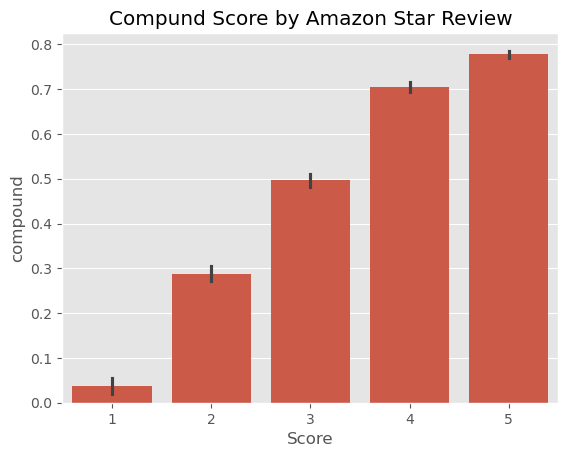

In [181]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

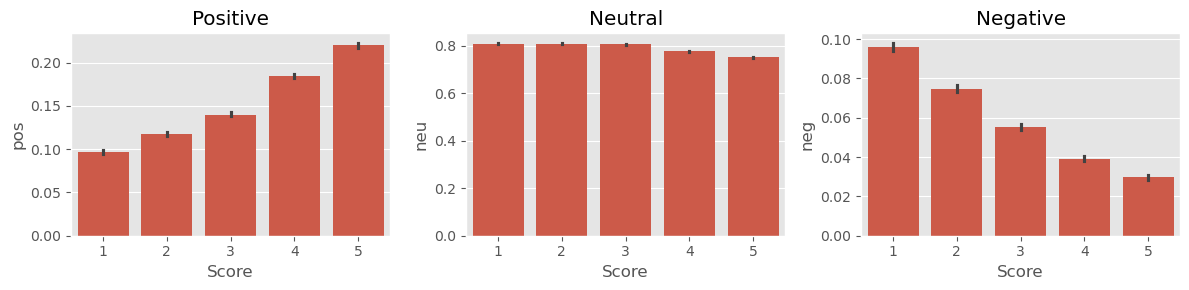

In [182]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# 2.2 RoBerta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [183]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [184]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\abdel\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [185]:
vaders.loc[4, ['Text', 'neg', 'neu', 'pos', 'compound', 'Score']]

Text        Great taffy at a great price.  There was a wid...
neg                                                       0.0
neu                                                     0.552
pos                                                     0.448
compound                                               0.9468
Score                                                       5
Name: 4, dtype: object

In [186]:
vaders.shape

(25000, 16)

In [187]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
# Fonction pour extraire les scores de polarité
def extract_roberta_scores(text):
    result = polarity_scores_roberta(text)
    return pd.Series([result['roberta_neg'], result['roberta_neu'], result['roberta_pos']])

In [188]:
roberta_result = polarity_scores_roberta(vaders.loc[100,'Text'])
roberta_result

{'roberta_neg': 0.30692154,
 'roberta_neu': 0.4565689,
 'roberta_pos': 0.23650958}

In [6]:
# res = {}
# for i, row in tqdm(df.iterrows(), total=len(df)):
#     try:
#         text = row['Text']
#         myid = i + 1
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
#         roberta_result = polarity_scores_roberta(text)
#         both = {**vader_result_rename, **roberta_result}
#         res[myid] = both
#     except RuntimeError:
#         print(f'Broke for id {myid}')  

In [190]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(vaders, how='left')

In [192]:
results_df.tail()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,neg,neu,...,Text,nopunct_text,text_tokenized,text_tokenized_without_stopword,text_lemmetized,body_len,Cap%,punct%,lemmatized_str,sentence_vector
1449,1461,0.000,0.899,0.101,0.5574,0.038705,0.269752,0.691543,0.000,0.899,...,"<span class=""tiny""> Length:: 1:38 Mins<br /><b...",span classtiny length 138 minsbr br spanskip t...,"[span, classtiny, length, 138, minsbr, br, spa...","[span, classtiny, length, 138, minsbr, br, spa...","[span, classtiny, length, 138, minsbr, br, spa...",255,5.9,13.3,span classtiny length 138 minsbr br spanskip p...,"[-0.14590682, 0.10049686, -0.30775544, 0.09861..."
1450,1462,0.000,0.827,0.173,0.9661,0.004531,0.019198,0.976271,0.000,0.827,...,I love the McDougall Asian Entr&eacute;es and ...,i love the mcdougall asian entreacutees and al...,"[i, love, the, mcdougall, asian, entreacutees,...","[love, mcdougall, asian, entreacutees, althoug...","[love, mcdougall, asian, entreacutees, althoug...",527,2.5,4.6,love mcdougall asian entreacutees although hav...,"[-0.17433834, -0.09895249, -0.3191918, 0.25030..."
1451,1463,0.000,0.891,0.109,0.6588,0.002202,0.023052,0.974746,0.000,0.891,...,This is a very tasty item. My wife doesn't eat...,this is a very tasty item my wife doesnt eat m...,"[this, is, a, very, tasty, item, my, wife, doe...","[tasty, item, wife, doesnt, eat, meat, staybr,...","[tasty, item, wife, doesnt, eat, meat, staybr,...",171,1.8,5.8,tasty item wife doesnt eat meat staybr hotel 4...,"[-0.16694832, 0.017402533, -0.4623808, 0.03388..."
1452,1464,0.000,0.749,0.251,0.9712,0.010373,0.067436,0.922191,0.000,0.749,...,"Sure, I could have gone on a food crusade at t...",sure i could have gone on a food crusade at th...,"[sure, i, could, have, gone, on, a, food, crus...","[sure, could, gone, food, crusade, local, groc...","[sure, could, gone, food, crusade, local, groc...",353,3.7,2.8,sure could gone food crusade local grocery fin...,"[-0.14343074, 0.25583136, -0.62899315, 0.19796..."
1453,1465,0.061,0.448,0.491,0.9369,0.006186,0.028779,0.965034,0.061,0.448,...,These are super tastey! I would definitely rec...,these are super tastey i would definitely reco...,"[these, are, super, tastey, i, would, definite...","[super, tastey, would, definitely, recommend, ...","[super, tastey, would, definitely, recommend, ...",108,5.6,4.6,super tastey would definitely recommend reason...,"[-0.46159828, 0.15569459, -0.7983387, 0.067234..."


In [193]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos',
       'compound', 'Score', 'Text', 'nopunct_text', 'text_tokenized',
       'text_tokenized_without_stopword', 'text_lemmetized', 'body_len',
       'Cap%', 'punct%', 'lemmatized_str', 'sentence_vector'],
      dtype='object')

In [201]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [202]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [196]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [197]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [49]:
from transformers  import pipeline

In [50]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\abdel\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [59]:
sent_pipeline('I like this Pizza!')

[{'label': 'POSITIVE', 'score': 0.9996060729026794}]

In [63]:
sent_pipeline('I\'m not sure how I feel about this!')

[{'label': 'NEGATIVE', 'score': 0.999508261680603}]

# BERT 
- Quick & easy way to run sentiment predictions

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import re

In [8]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

C:\Users\abdel\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [206]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [207]:
result = model(tokens)

In [208]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [209]:
int(torch.argmax(result.logits))+1

4